<a href="https://colab.research.google.com/github/Aamir-Khan-Maarofi/Fashion_Training_Example/blob/master/Copy_of_ML_Codelab_Outline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Tensorflow 2.0

In [0]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 120kB/s 
     |████████████████████████████████| 3.8MB 47.4MB/s 
     |████████████████████████████████| 450kB 71.0MB/s 
     |████████████████████████████████| 81kB 13.2MB/s 
ERROR: tensorboard 2.0.1 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.7.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorflow 1.15.0
    Uninstalling tensorflow-1.15.0:
      Successfully uninstall

# Importing dependenices

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt 

print(tf.__version__)

2.0.0


# Image plotting fuctions

In [0]:
def plot_simple_image(image_array):
  plt.figure()
  plt.imshow(image_array)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def plot_image(i, predictions_array, true_label, img):
  # This function plots an image along with its predicted label and prediction confidence
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  # This function plots the predicted label along with the correct label in a bar graph
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Training a basic Neural Network
Using Fashion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Check shape of training images

In [0]:
train_images.shape

(60000, 28, 28)

Check number of training images

In [0]:
len(train_images)

60000

Check shape of test images

Check number of test images

Look at train labels

In [0]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Data Preprocessing

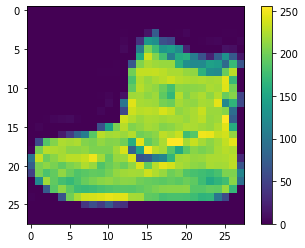

In [0]:
plot_simple_image(train_images[0])

In [0]:
# Divide train_images by 255.0 to bring it in the range of 0-1
train_images = train_images / 255.0

# Divide test_images by 255.0 to bring it in the range of 0-1
test_images = test_images / 255.0

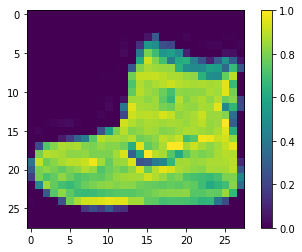

In [0]:
plot_simple_image(train_images[0])

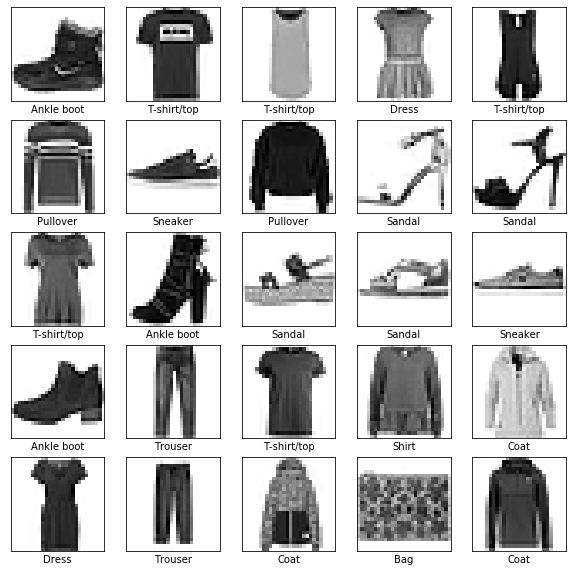

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# Building the model

In [0]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape = (28, 28)),
     keras.layers.Dense(128, activation = 'relu'),
     keras.layers.Dense(10, activation = "softmax")
])

In [0]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.7458 - accuracy: 0.7567
Epoch 2/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.5143 - accuracy: 0.8251
Epoch 3/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4708 - accuracy: 0.8377
Epoch 4/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4450 - accuracy: 0.8460
Epoch 5/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4266 - accuracy: 0.8530
Epoch 6/10
60000/60000 [==============================] - 4s 62us/sample - loss: 0.4133 - accuracy: 0.8558
Epoch 7/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.4016 - accuracy: 0.8613
Epoch 8/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3915 - accuracy: 0.8640
Epoch 9/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.3828 - accuracy: 0.8670
Epoch 10/10
60

# Evaluating the accuracy of he model

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

# Making Predictions using the model

In [0]:
predictions = model.predict(test_images)

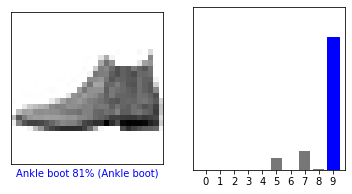

In [0]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

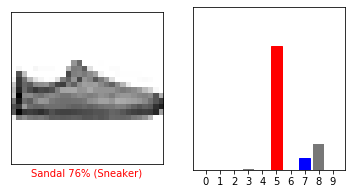

In [0]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

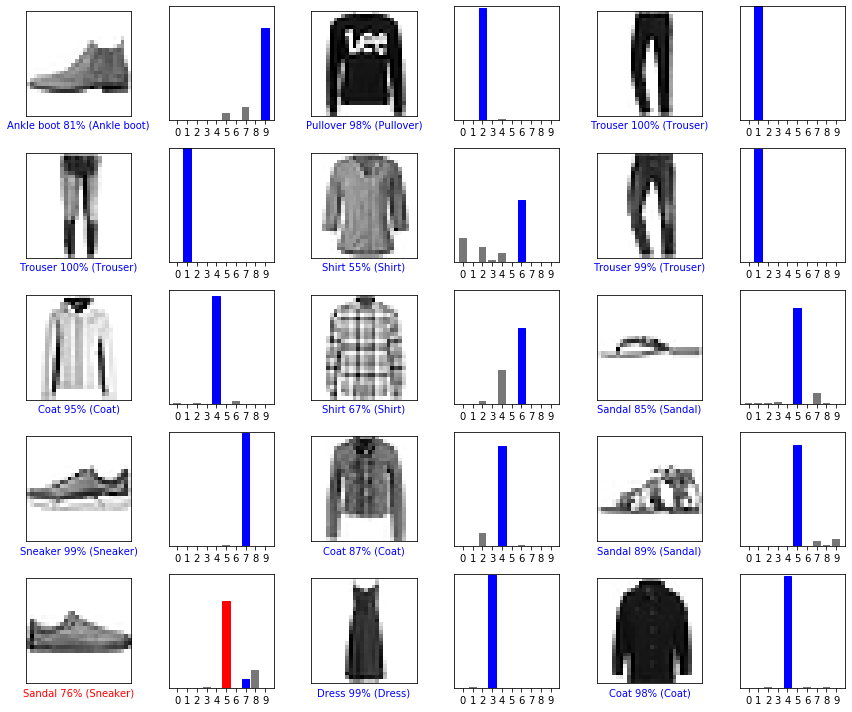

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Training a Convolutional Neural Network
Using CIFAR-10 datasat

In [0]:
cifar10 = keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = 

In [0]:
# print shape of train and test images



In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


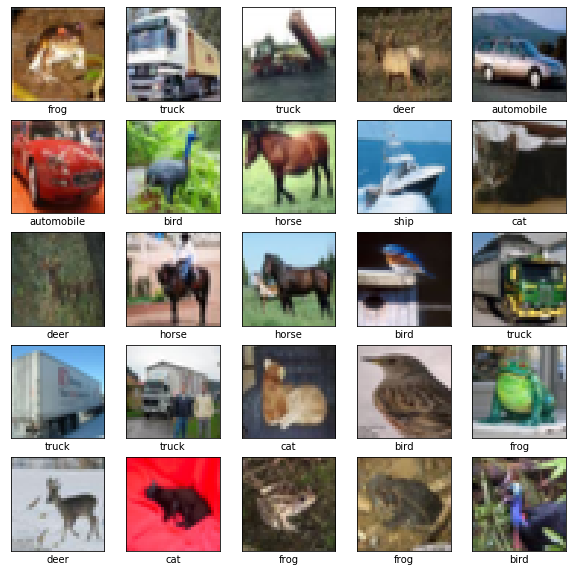

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Updated Image plotting functions

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i][0], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i][0]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

# Preprocessing the data

In [0]:
# Divide train_images by 255.0 to bring it in the range of 0-1


# Divide test_images by 255.0 to bring it in the range of 0-1


# Building the model

In [0]:
cnn_model = keras.models.Sequential()
cnn_model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(keras.layers.MaxPooling2D((2, 2)))
cnn_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(keras.layers.MaxPooling2D((2, 2)))
cnn_model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))

In [0]:
cnn_model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [0]:
cnn_model.add(keras.layers.Flatten())
# Add 2 dense layers

In [0]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [0]:
cnn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = 

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.3826 - accuracy: 0.5019 - val_loss: 1.1698 - val_accuracy: 0.5894
Epoch 2/30
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.1141 - accuracy: 0.6080 - val_loss: 1.0325 - val_accuracy: 0.6398
Epoch 3/30
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.9851 - accuracy: 0.6534 - val_loss: 0.9563 - val_accuracy: 0.6706
Epoch 4/30
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.8971 - accuracy: 0.6856 - val_loss: 0.9453 - val_accuracy: 0.6715
Epoch 5/30
50000/50000 [==============================] - 83s 2ms/sample - loss: 0.8353 - accuracy: 0.7080 - val_loss: 0.9514 - val_accuracy: 0.6762
Epoch 6/30
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.7882 - accuracy: 0.7243 - val_loss: 0.9519 - val_accuracy: 0.6768
Epoch 7/30
50000/50000 [==============================] 

# Evaluating the model

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

# Evaluate the model
test_loss, test_acc =

In [0]:
print(test_acc)

# Predictions

In [0]:
predictions = 

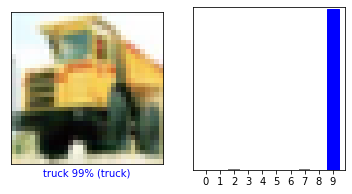

In [0]:
i = 400
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()